# Linear Regression and PCA

### Writing my own Linear Regression and Principle Component Analysis functions and applying them to real data sets. 

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy import stats
import pandas as pd
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

## Linear regression 

To calculate the slope and intercept, I solved the normal equation below, where $\beta$ is the vector of parameters (slope and intercept), $A$ is the matrix containing a column of x values and a column of ones, $A^T$ is its transpose, and $y$ is the column vector of y values:

$$
(A^T A) \beta = A^T y
$$

To calculate the coefficient of determination:

$$ r^2 = \frac{Cov(X,Y)^2}{Var(X)Var(Y)}$$


In [2]:
def lin_reg_func (exp_vec, res_vec):
    ones = np.array([1]*len(exp_vec))
    A = np.column_stack((ones,exp_vec))
    T = A.T
    a = T@A
    b = T@res_vec
    beta = np.linalg.solve(a,b)
    r2 = (np.cov(exp_vec,res_vec))**2 / (np.var(exp_vec, ddof=1)*np.var(res_vec, ddof=1)) 
    return [print('m:', beta.item(1), 'int:', beta.item(0), 'r^2:', r2.item(1))]

### Applying my function to macaroni pengiun excersise data with heart rate as the explanatory and oxygen consumption as the response variable. 

In [3]:
macaroni = pd.read_csv("Macaroni_Penguins_Green.csv")
macaroni.head()

,Group,ID,Heart Rate,Mass Specific VO2
0,BM,cal04,96.0,10.823194
1,BM,cal04,119.0,17.088499
2,BM,cal04,162.0,29.527144
3,BM,cal04,138.4,24.419926
4,BM,cal04,108.6,11.325901


In [4]:
hr = macaroni['Heart Rate']
vo2 = macaroni['Mass Specific VO2']

#my function
print('MY FUNCTION')
lin_reg_func(hr, vo2)

#double check with built in linregress function
slope, intercept, r, p_value, std_err = stats.linregress(hr,vo2)
print('BUILT IN FUNCTION')
print("m:        ", slope)
print("intercept:", intercept)
print("r^2:      ", r**2)

MY FUNCTION
m: 0.18035385335380472 int: -2.8688217734099393 r^2: 0.4908281215079641
BUILT IN FUNCTION
m:         0.18035385335380294
intercept: -2.868821773409703
r^2:       0.490828121507964


### Plotting residuals of the model to check assumptions made when performing linear regression

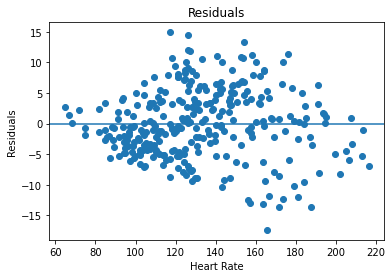

In [5]:
def residual_func (exp_vec, res_vec):
    ones = np.array([1]*len(exp_vec))
    A = np.column_stack((ones, exp_vec))
    T = A.T
    a = T@A
    b = T@res_vec
    beta = np.linalg.solve(a,b)
    m = beta.item(1)
    intercept = beta.item(0)
    vo2_prediction = intercept + m*exp_vec
    return res_vec - vo2_prediction

residuals = residual_func(hr, vo2)
plt.scatter(hr, residuals)
plt.title('Residuals')
plt.xlabel('Heart Rate')
plt.ylabel('Residuals')
plt.axhline(y=0)
plt.show()

The residual plot does look consistent with the assumption of linear regression because it appears to be a random cloud of points around the horizontal axis.

## PCA Function
Inputs: n x m matrix of data, the dimension along which to perform PCA (0 or 1 - rows or columns), and the number (k) of principal components to return.

Outputs: k principal components and their respective coefficients of determinaton

In [6]:
def pca_func(X, d, k):
    matrix = np.array(X)
    if d == 0:
        covmat = np.cov(matrix, rowvar = True)  
    if d == 1:
        covmat = np.cov(matrix, rowvar = False)
    eigval, eigvec = np.linalg.eig(covmat)
    eigval = np.real(eigval)
    eigvec = np.real(eigvec)
    index = eigval.argsort()[::-1]
    eigval = eigval[index]
    eigvec = eigvec[:,index]
    var = []
    for i in range(len(eigval)):
        var.append(eigval[i] / np.sum(eigval))
    return eigvec[:,0:k], var

### Applying my PCA function to a gene expression dataset

The Spellman dataset provides the gene expression data measured in *Saccharomyces cerevisiae* cell cultures that have been synchronized at different points of the cell cycle. References here: http://finzi.psych.upenn.edu/library/minerva/html/Spellman.html

In [7]:
spellman = pd.read_csv("Spellman.csv")
spellman.head()

,time,YAL001C,YAL014C,YAL016W,YAL020C,YAL022C,YAL036C,YAL038W,YAL039C,YAL040C,...,YPR189W,YPR191W,YPR193C,YPR194C,YPR197C,YPR198W,YPR199C,YPR201W,YPR203W,YPR204W
0,40,-0.07,0.215,0.15,-0.350,-0.415,0.540,-0.625,0.05,0.335,...,0.13,-0.435,-0.005,-0.365,0.015,-0.06,0.155,-0.255,0.57,0.405
1,50,-0.23,0.090,0.15,-0.280,-0.590,0.330,-0.600,-0.24,0.050,...,0.08,-0.130,0.020,-0.590,0.100,0.08,0.190,-0.360,0.12,0.170
2,60,-0.10,0.025,0.22,-0.215,-0.580,0.215,-0.400,-0.19,-0.040,...,-0.06,-0.350,-0.180,-0.550,0.210,0.21,0.235,-0.300,-0.07,-0.045
3,70,0.03,-0.040,0.29,-0.150,-0.570,0.100,-0.200,-0.14,-0.130,...,-0.20,-0.570,-0.380,-0.510,0.320,0.34,0.280,-0.240,-0.26,-0.260
4,80,-0.04,-0.040,-0.10,0.160,-0.090,-0.270,-0.130,-1.22,0.020,...,0.05,-0.210,0.030,0.390,0.110,0.65,-0.260,1.300,-0.44,-0.600


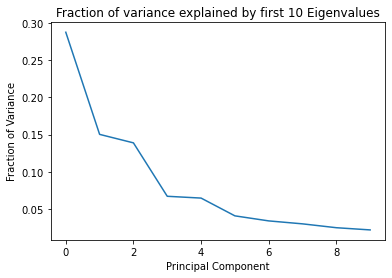

Total variance explained by the first 10 eigenvalues: 0.8611359654492433


In [8]:
#remove time column
spellman_genes = spellman.iloc[:,np.arange(1,4382)]

#run pca function
spell_pca = pca_func(spellman_genes, 1, 10)

#extract variance of top 10 eigenvalues
eigval_10 = spell_pca[1][0:10]
pcs = np.arange(0,10,1)

plt.plot(pcs, eigval_10)
plt.xlabel('Principal Component')
plt.ylabel('Fraction of Variance')
plt.title('Fraction of variance explained by first 10 Eigenvalues')
plt.show()

print('Total variance explained by the first 10 eigenvalues:', sum(eigval_10))